<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/FYP/blob/main/HealthMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Long Short Term Memory

In [93]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = LSTM(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
35/35 [==============================] - 20s 473ms/step - loss: 0.6823 - accuracy: 0.5883 - val_loss: 0.6719 - val_accuracy: 0.7623
Epoch 2/20
35/35 [==============================] - 19s 532ms/step - loss: 0.6728 - accuracy: 0.6548 - val_loss: 0.6600 - val_accuracy: 0.7459
Epoch 3/20
35/35 [==============================] - 16s 458ms/step - loss: 0.6636 - accuracy: 0.6958 - val_loss: 0.6480 - val_accuracy: 0.7705
Epoch 4/20
35/35 [==============================] - 16s 460ms/step - loss: 0.6509 - accuracy: 0.7140 - val_loss: 0.6351 - val_accuracy: 0.7705
Epoch 5/20
35/35 [==============================] - 17s 486ms/step - loss: 0.6412 - accuracy: 0.7259 - val_loss: 0.6215 - val_accuracy: 0.7787
Epoch 6/20
35/35 [==============================] - 16s 457ms/step - loss: 0.6280 - accuracy: 0.7341 - val_loss: 0.6060 - val_accuracy: 0.7787
Epoch 7/20
35/35 [==============================] - 16s 459ms/step - loss: 0.6160 - accuracy: 0.7459 - val_loss: 0.5867 - val_accuracy: 0.7951

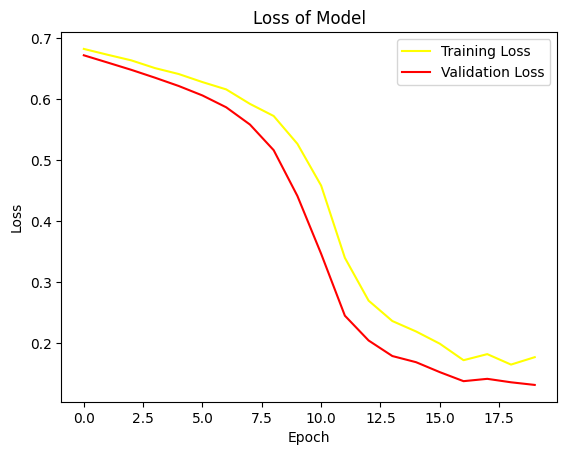

In [94]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Simple Recurrent Neural Network

In [95]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = SimpleRNN(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
35/35 [==============================] - 7s 160ms/step - loss: 0.7488 - accuracy: 0.5164 - val_loss: 0.6934 - val_accuracy: 0.5902
Epoch 2/20
35/35 [==============================] - 4s 112ms/step - loss: 0.7465 - accuracy: 0.5036 - val_loss: 0.6806 - val_accuracy: 0.6885
Epoch 3/20
35/35 [==============================] - 4s 115ms/step - loss: 0.7316 - accuracy: 0.5264 - val_loss: 0.6692 - val_accuracy: 0.6803
Epoch 4/20
35/35 [==============================] - 5s 149ms/step - loss: 0.7166 - accuracy: 0.5419 - val_loss: 0.6573 - val_accuracy: 0.6803
Epoch 5/20
35/35 [==============================] - 4s 115ms/step - loss: 0.7150 - accuracy: 0.5209 - val_loss: 0.6471 - val_accuracy: 0.7049
Epoch 6/20
35/35 [==============================] - 4s 115ms/step - loss: 0.7033 - accuracy: 0.5474 - val_loss: 0.6377 - val_accuracy: 0.7213
Epoch 7/20
35/35 [==============================] - 5s 154ms/step - loss: 0.7027 - accuracy: 0.5383 - val_loss: 0.6291 - val_accuracy: 0.7213
Epoch 

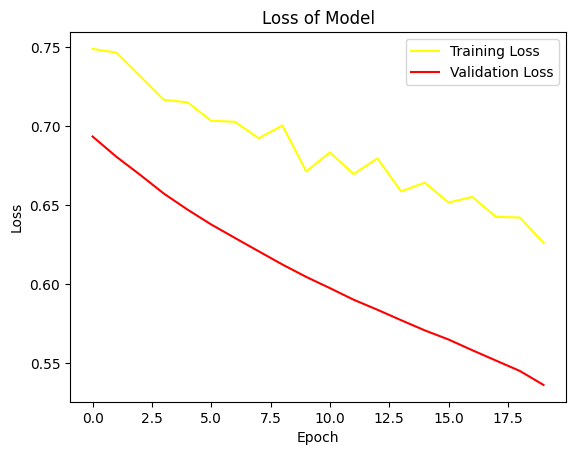

In [96]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##Gated Recurrent Unit

In [97]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GRU, Dense, Input, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('BridgeData.csv')

data['Sequence'] = data['Sequence'].apply(lambda x: [float(val) for val in x.strip('[]').split()])
sequences = np.array(data['Sequence'].tolist())
data['Healthy'] = data['Healthy'].astype(int)

max_len = max(len(seq) for seq in sequences)
sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post', dtype='float32')

X, y = sequences_padded, data['Healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(data)*0.1), shuffle=True, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, max_len)).reshape(X_train.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, max_len)).reshape(X_test.shape)

inputs = Input(shape=(max_len, 1))

x = GRU(units=32, activation='tanh', dropout=0.2, recurrent_dropout=0.2)(inputs)
x = Dense(32, activation='relu')(x)  # Adding an additional dense layer
x = Dropout(0.5)(x)  # Adding dropout for regularization
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.1,
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
35/35 [==============================] - 19s 460ms/step - loss: 0.7108 - accuracy: 0.4344 - val_loss: 0.7010 - val_accuracy: 0.3115
Epoch 2/20
35/35 [==============================] - 16s 456ms/step - loss: 0.6913 - accuracy: 0.5182 - val_loss: 0.6819 - val_accuracy: 0.5820
Epoch 3/20
35/35 [==============================] - 15s 430ms/step - loss: 0.6799 - accuracy: 0.5073 - val_loss: 0.6623 - val_accuracy: 0.6066
Epoch 4/20
35/35 [==============================] - 15s 431ms/step - loss: 0.6701 - accuracy: 0.5383 - val_loss: 0.6441 - val_accuracy: 0.6311
Epoch 5/20
35/35 [==============================] - 15s 434ms/step - loss: 0.6550 - accuracy: 0.5984 - val_loss: 0.6272 - val_accuracy: 0.6393
Epoch 6/20
35/35 [==============================] - 15s 435ms/step - loss: 0.6444 - accuracy: 0.5993 - val_loss: 0.6126 - val_accuracy: 0.6393
Epoch 7/20
35/35 [==============================] - 15s 444ms/step - loss: 0.6360 - accuracy: 0.6020 - val_loss: 0.6004 - val_accuracy: 0.6475

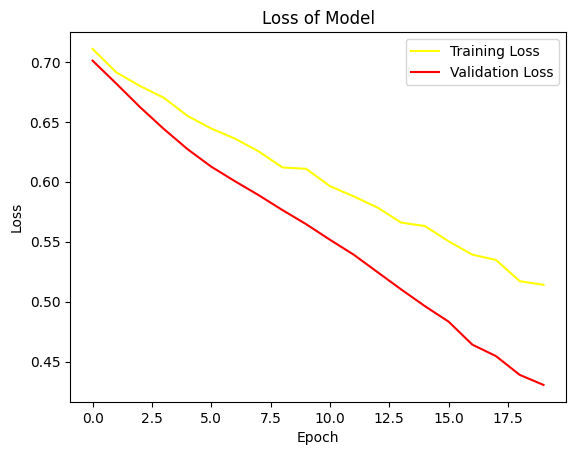

In [98]:
plt.plot(history.history['loss'], label='Training Loss', color='yellow')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("Loss of Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()